In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/Data-Analyst-Project-Portfolio/Netflix-WatchPattern-Analytics/data/netflix_cleaned.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Watch_Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

In [4]:
if 'UserID' not in df.columns:
    import numpy as np
    np.random.seed(42)
    df['UserID'] = np.random.choice(range(1, 101), size=len(df))


In [11]:
df['Title'] = df['Video_Title'].str.strip()
df.sort_values(by=['UserID', 'Watch_Date', 'Video_Title'], inplace=True)

In [14]:
df['DateOnly'] = df['Date'].dt.date
binge_df = df.groupby(['User_ID', 'Video_Title', 'DateOnly']).size().reset_index(name='WatchCount')

binge_sessions = binge_df[binge_df['WatchCount'] >= 3]
binge_sessions.head()

,User_ID,Video_Title,DateOnly,WatchCount


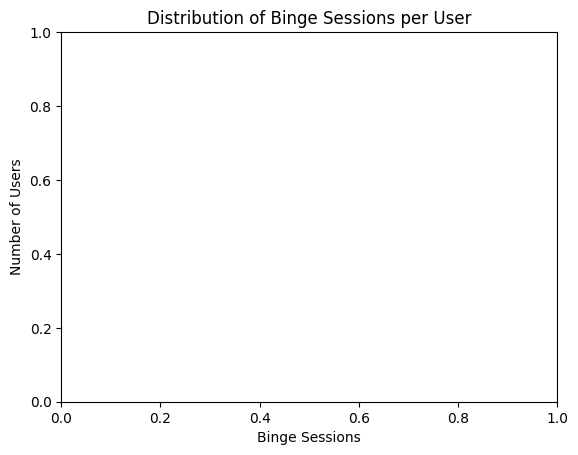

In [15]:
user_binge_counts = binge_sessions.groupby('User_ID').size().reset_index(name='BingeSessions')

sns.histplot(user_binge_counts['BingeSessions'], bins=10, kde=True, color="purple")
plt.title("Distribution of Binge Sessions per User")
plt.xlabel("Binge Sessions")
plt.ylabel("Number of Users")
plt.show()


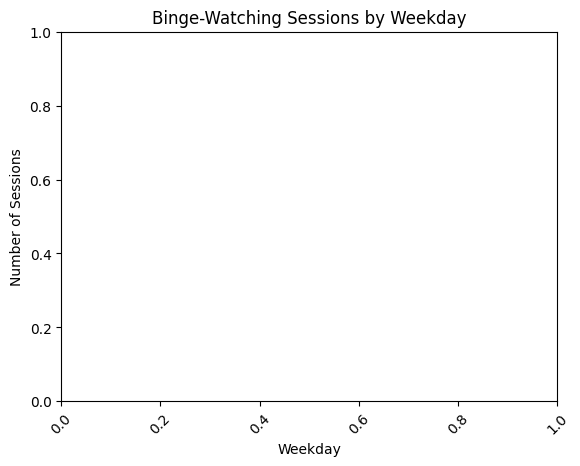

In [16]:
binge_sessions['Weekday'] = pd.to_datetime(binge_sessions['DateOnly']).dt.day_name()

sns.countplot(data=binge_sessions, x='Weekday', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Binge-Watching Sessions by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.show()


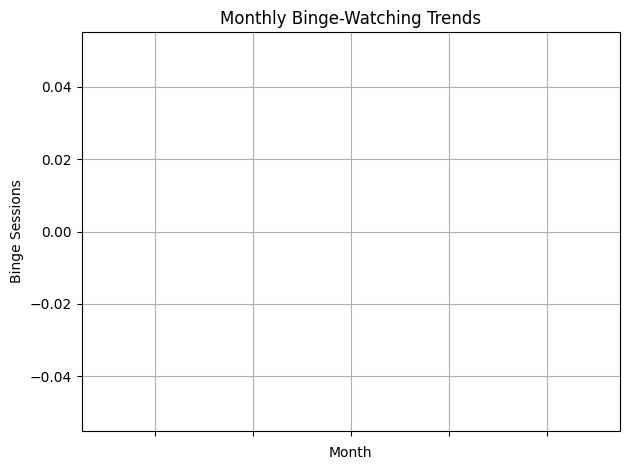

In [17]:
binge_sessions['Month'] = pd.to_datetime(binge_sessions['DateOnly']).dt.to_period('M').astype(str)
monthly_binge = binge_sessions['Month'].value_counts().sort_index()

monthly_binge.plot(kind='line', marker='o', color='darkred')
plt.title("Monthly Binge-Watching Trends")
plt.xlabel("Month")
plt.ylabel("Binge Sessions")
plt.grid(True)
plt.tight_layout()
plt.show()